In [276]:
import pandas as pd 
import numpy as np 

In [277]:
train_data = pd.read_csv(r"C:\Users\liber\Documents\Datasets\House Prices\train.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [278]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [279]:
numericas = train_data[["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"]]
numericas

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,150,856,...,2,548,0,61,0,0,0,0,0,2008
1,80.0,9600,6,8,1976,1976,0.0,978,284,1262,...,2,460,298,0,0,0,0,0,0,2007
2,68.0,11250,7,5,2001,2002,162.0,486,434,920,...,2,608,0,42,0,0,0,0,0,2008
3,60.0,9550,7,5,1915,1970,0.0,216,540,756,...,3,642,0,35,272,0,0,0,0,2006
4,84.0,14260,8,5,2000,2000,350.0,655,490,1145,...,3,836,192,84,0,0,0,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,953,953,...,2,460,0,40,0,0,0,0,0,2007
1456,85.0,13175,6,6,1978,1988,119.0,790,589,1542,...,2,500,349,0,0,0,0,0,0,2010
1457,66.0,9042,7,9,1941,2006,0.0,275,877,1152,...,1,252,0,60,0,0,0,0,2500,2010
1458,68.0,9717,5,6,1950,1996,0.0,49,0,1078,...,1,240,366,0,112,0,0,0,0,2010


In [280]:
numericas.isna().sum() != 0

LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
TotRmsAbvGrd     False
Fireplaces       False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
YrSold           False
dtype: bool

In [281]:
numericas.fillna(0, inplace=True)

C:\Users\liber\AppData\Local\Temp\ipykernel_8248\1352010807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas.fillna(0, inplace=True)


In [282]:
categoricas = train_data.drop(["Id", "SalePrice", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"], axis=1)
categoricas

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NaN,NaN,NaN,2,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,NaN,NaN,NaN,5,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NaN,NaN,NaN,9,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,NaN,NaN,NaN,2,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,NaN,NaN,NaN,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,NaN,NaN,NaN,8,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,2,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,5,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,NaN,NaN,NaN,4,WD,Normal


In [283]:
Y_train = train_data["SalePrice"]

In [334]:
from statistics import mean, median

In [335]:
mean(Y_train)

180921.19589041095

In [336]:
median(Y_train)

163000.0

In [284]:
max(Y_train)

755000

In [285]:
max(Y_train) * 5

3775000

In [286]:
min(Y_train)

34900

In [287]:
from sklearn.preprocessing import OneHotEncoder

In [288]:
encoder = OneHotEncoder(handle_unknown='ignore', drop=None, sparse_output=False)
encoder.fit(categoricas)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [289]:
categoricas_transformadas = encoder.transform(categoricas) 
categoricas_transformadas

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [290]:
categoricas_transformadas.shape

(1460, 542)

In [291]:
train_transformed = np.hstack((numericas, categoricas_transformadas))
train_transformed

array([[6.500e+01, 8.450e+03, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.000e+01, 9.600e+03, 6.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 1.125e+04, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.600e+01, 9.042e+03, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 9.717e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.500e+01, 9.937e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [292]:
train_transformed.shape

(1460, 572)

In [293]:
X_embedded.shape

(1460, 15)

In [294]:
from sklearn.linear_model import LinearRegression

In [295]:
linear_reg = LinearRegression().fit(train_transformed, Y_train)
linear_reg.score(train_transformed, Y_train)

0.9467546051467869

In [296]:
import matplotlib.pyplot as plt

In [297]:
true_value = np.array(Y_train) 
predicted_value = np.array(linear_reg.predict(train_transformed)) 

In [298]:
min(predicted_value)

23792.695890426636

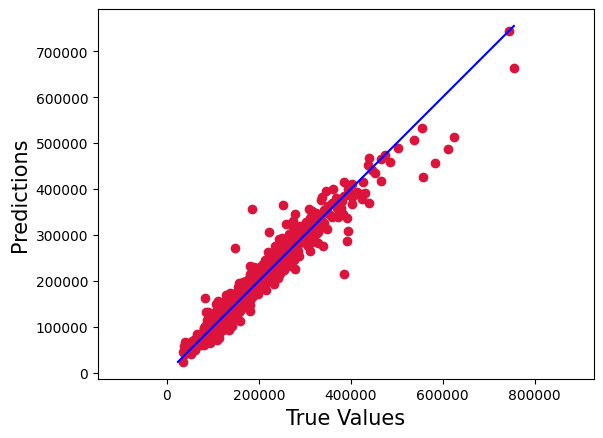

In [299]:
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [300]:
from sklearn.metrics import mean_squared_error
reg_lin_erro = mean_squared_error(true_value, predicted_value)
reg_lin_erro

335807448.4826606

In [301]:
from sklearn.neighbors import KNeighborsRegressor

In [302]:
Ns = np.arange(3, 12, dtype=int)
erros = np.zeros(9)
for j, i in enumerate(Ns):
    neigh = KNeighborsRegressor(n_neighbors=i).fit(train_transformed, true_value)
    knn_erro = mean_squared_error(true_value, neigh.predict(train_transformed))
    erros[j] = knn_erro

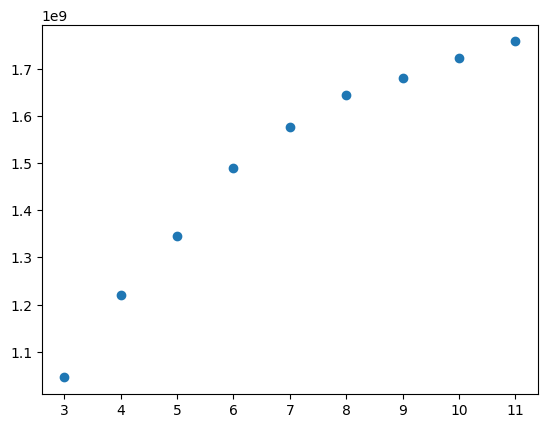

In [303]:
plt.scatter(Ns, erros)

In [304]:
neigh = KNeighborsRegressor(n_neighbors=3).fit(train_transformed, true_value)
knn_erro = mean_squared_error(true_value, neigh.predict(train_transformed))
knn_erro - reg_lin_erro

709530769.6773851

In [305]:
test_data = pd.read_csv(r"C:\Users\liber\Documents\Datasets\House Prices\test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [306]:
numericas_test = test_data[["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"]]
categoricas_test = test_data.drop(["Id", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"], axis=1)

In [307]:
numericas_test.isna().sum()

LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
YrSold             0
dtype: int64

In [308]:
numericas_test.fillna(0, inplace=True)
test_transformed = np.hstack((numericas_test, encoder.transform(categoricas_test)))
test_transformed 

C:\Users\liber\AppData\Local\Temp\ipykernel_8248\280145378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas_test.fillna(0, inplace=True)


array([[8.0000e+01, 1.1622e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.1000e+01, 1.4267e+04, 6.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.4000e+01, 1.3830e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.6000e+02, 2.0000e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.2000e+01, 1.0441e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.4000e+01, 9.6270e+03, 7.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [309]:
RESULTADOS = linear_reg.predict(test_transformed)
RESULTADOS

array([117124.69589043, 165558.19589043, 188495.69589043, ...,
       179265.19589043, 114049.38597107, 220055.38597107])

In [310]:
mean(RESULTADOS)

-29130308.209263675

In [311]:
min(RESULTADOS)

-7306966373.80411

In [312]:
max(RESULTADOS)

17354662363.695892

In [313]:
max(RESULTADOS) - min(RESULTADOS)

24661628737.5

In [314]:
sum(i < 15000 for i in RESULTADOS)

130

In [315]:
sum(i > 4_000_000 for i in RESULTADOS)

40

In [316]:
for i in range(len(RESULTADOS)):
    if RESULTADOS[i] < 15000:
        RESULTADOS[i] = None 
    elif RESULTADOS[i] > 4_000_000:
        RESULTADOS[i] = None 

In [317]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [318]:
test_data.insert(loc=1, column='SalePrice', value=RESULTADOS)
test_data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,117124.695890,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,165558.195890,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,188495.695890,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,194219.195890,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,202290.195890,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,81430.695890,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,66482.695890,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,179265.195890,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,114049.385971,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [319]:
test_data["SalePrice"].isna().sum()

170

In [320]:
from sklearn.impute import KNNImputer

In [321]:
np.array(RESULTADOS, ndmin=2).shape

(1, 1459)

In [322]:
RESULTADOS = np.transpose(np.array(RESULTADOS, ndmin=2))

In [323]:
X_pre_imp = np.hstack((RESULTADOS, test_transformed))
X_pre_imp.shape

(1459, 573)

In [324]:
imputer = KNNImputer(n_neighbors=10)
X_imp = imputer.fit_transform(X_pre_imp)

In [325]:
RESULTADOS = X_imp[:, 0]

In [326]:
RESULTADOS

array([117124.69589043, 165558.19589043, 188495.69589043, ...,
       179265.19589043, 114049.38597107, 220055.38597107])

In [327]:
min(RESULTADOS)

21753.695890426636

In [328]:
mean(RESULTADOS)

182709.51389055376

In [329]:
max(RESULTADOS)

3398039.1958904266

In [330]:
np.argmax(RESULTADOS)

949

In [331]:
ordenado = sorted(RESULTADOS)

In [332]:
median(RESULTADOS)

161901.19589042664

(array([ 18.,  72., 290., 334., 249., 198., 100.,  68.,  42.,  29.]),
 array([ 21753.69589043,  56406.04589043,  91058.39589043, 125710.74589043,
        160363.09589043, 195015.44589043, 229667.79589043, 264320.14589043,
        298972.49589043, 333624.84589043, 368277.19589043]),
 <BarContainer object of 10 artists>)

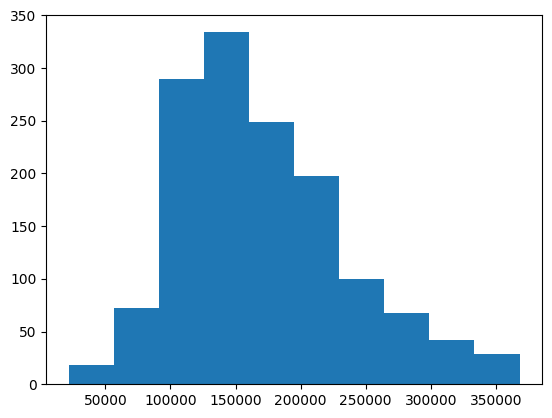

In [333]:
plt.hist(ordenado[0:1400])

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

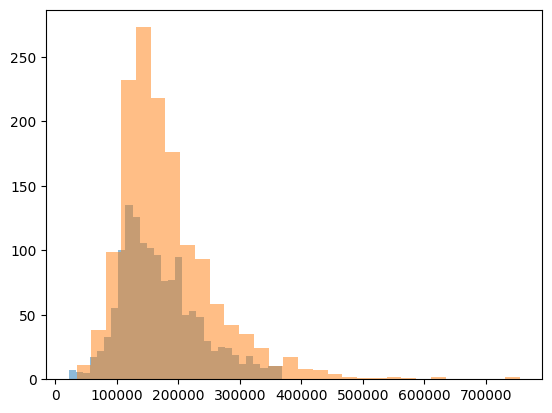

In [337]:
plt.hist(ordenado[0:1400], bins=30, alpha=0.5, label="data1")
plt.hist(Y_train, bins=30, alpha=0.5, label="data2")

In [341]:
test_data.drop("SalePrice", axis=1, inplace=True)
test_data.insert(loc=1, column='SalePrice', value=RESULTADOS)
test_data["SalePrice"].isna().sum()

0

In [342]:
test_data[["Id", "SalePrice"]]

,Id,SalePrice
0,1461,117124.695890
1,1462,165558.195890
2,1463,188495.695890
3,1464,194219.195890
4,1465,202290.195890
...,...,...
1454,2915,81430.695890
1455,2916,66482.695890
1456,2917,179265.195890
1457,2918,114049.385971


In [ ]:
test_data[["Id", "SalePrice"]].to_csv(r"C:\Users\liber\Documents\GitHub\Portifolio\Kaggle\House_Prices_resp1.csv", index=False)